In [1]:
from util import *

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing

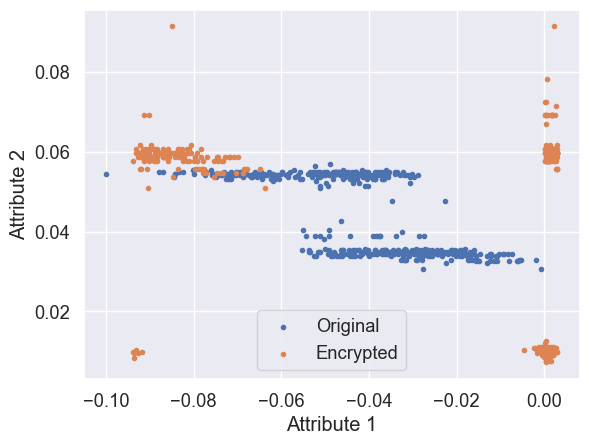

In [3]:
# adv dist
sns.set(font_scale=1.2)
ds = read_libsvm('cod-rna')

a, b = 0, 1

xs = [x[a] for x in ds[0]][:500]
ys = [x[b] for x in ds[0]][:500]

plt.scatter(preprocessing.normalize([xs])[0], preprocessing.normalize([ys])[0], marker='.', label='Original')

trans_phase(ds, a)
trans_phase(ds, b)
trans_ope(ds)

xs = [x[a] for x in ds[0]][:500]
ys = [x[b] for x in ds[0]][:500]

plt.scatter(preprocessing.normalize([xs])[0], preprocessing.normalize([ys])[0], marker='.', label='Encrypted')

plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()

plt.savefig(r'D:\work\phase_tree/figure/adv1.pdf')

In [ ]:
# dist1 2
sns.set(font_scale=1.5)
xs = np.random.normal(size=3000)

fig = sns.displot(xs, kind="kde")
fig.set_axis_labels('$X$')
fig.savefig(r'D:\work\phase_tree/dis1.pdf')

pa = Phaser(xs, (max(xs)-min(xs)) * 0.5)
xx = [pa(x) for x in xs]

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('$X$')
fig.savefig(r'D:\work\phase_tree/dis2.pdf')

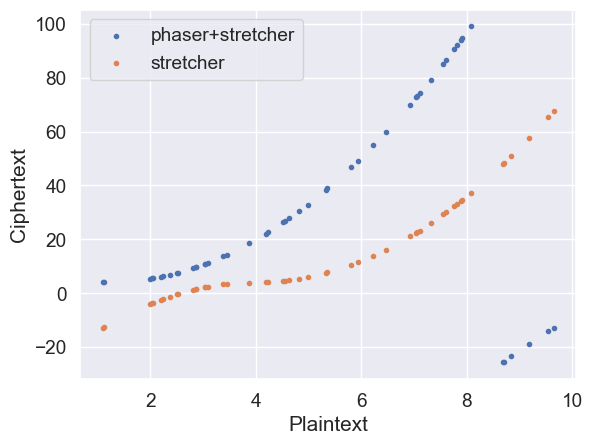

In [8]:
# pole
sns.set(font_scale=1.25)
# xs = np.random.normal(size=3000)
xs = np.random.uniform(1, 10, 50)
xs = sorted(xs)

ope = OPE()
pa = Phaser(xs, (max(xs)-min(xs)) * 0.33)
xx = [ope(pa(x)) for x in xs]
xy =[ope(x) for x in xs]

# fig = sns.lineplot({xs[i]: xx[i] for i in range(len(xx))})
plt.scatter(xs, xx, marker='.', label='phaser+stretcher')
plt.scatter(xs, xy, marker='.', label='stretcher')
plt.xlabel('Plaintext')
plt.ylabel('Ciphertext')
plt.legend()
# fig.set_axis_labels('$X$')
plt.savefig(r'D:\work\phase_tree/figure/pole.pdf')

In [ ]:
# dist3 4
sns.set(font_scale=1.5)

xs = np.random.uniform(-1, 1, 3000)
l = min(xs)
r = max(xs)
t = random.choice(range(len(xs)))


fig = sns.displot(xs, kind="kde")
fig.set_axis_labels('$X$')

plt.axvline(xs[t], color='red', linestyle='--')
plt.text(xs[t]+0.05, 0.45, f'$X$=$t$')
plt.axvline(l, color='gold', linestyle='--')
plt.text(l+0.05, 0.45, f'$X$=$l$')
plt.axvline(r, color='green', linestyle='--')
plt.text(r+0.05, 0.45, f'$X$=$r$')

fig.savefig(r'D:\work\phase_tree/dis3.pdf')

pa = Phaser(xs, (max(xs)-min(xs)) * 0.33)
xx = [pa(x) for x in xs]

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('$X$')

plt.axvline(xx[t], color='red', linestyle='--')
plt.text(xx[t]+0.02, 0.35, f'$X$=$t^\prime$')

plt.axvline(l, color='gold', linestyle='--')
plt.text(l-0.25, 0.45, f'$X$=$l$')

plt.axvline(pa(l), color='purple', linestyle='--')
plt.text(pa(l)+0.05, 0.45, f'$X$=$l^\prime$')

plt.axvline(r, color='green', linestyle='--')
plt.text(r+0.05, 0.45, f'$X$=$r$')

fig.savefig(r'D:\work\phase_tree/dis4.pdf')

In [ ]:
def fakeope(A):
    a = sorted(set(A))
    a = {v: k+1 for k, v in enumerate(a)}
    return [a[i] for i in A]

In [ ]:
# ope/phaser
iris = datasets.load_iris()
xs = iris.data
ys = iris.target
xx = [x[3] for x in xs]

sns.set(font_scale=1.5)

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c1.pdf')

ox = fakeope(xx)
fig = sns.displot(ox, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c2.pdf')

pa = Phaser(xx, (max(xx)-min(xx)) * 0.5)
px = [pa(x) for x in xx]
fig = sns.displot(px, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c3.pdf')

po = fakeope(px)
fig = sns.displot(po, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c4.pdf')

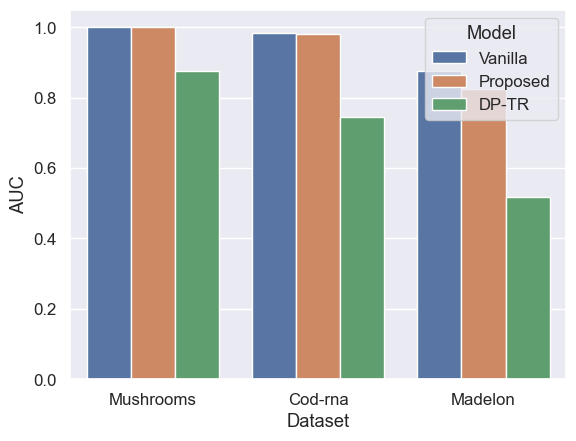

In [6]:
# Phaser vs DP
sns.set(font_scale=1.1)
df = pd.DataFrame({
    'Dataset':  ['Mushrooms', 'Mushrooms', 'Mushrooms', 'Cod-rna', 'Cod-rna', 'Cod-rna', 'Madelon', 'Madelon', 'Madelon'],
    'Model': ['Vanilla', 'Proposed', 'DP-TR'] * 3,
    'AUC': [1.000, 1.000, 0.8766280693903764] + [0.983, 0.982, 0.7447951548627856] + [0.875, 0.824, 0.5174222222222222],
})

# sns.set(font_scale=1.5)
fig = sns.barplot(x="Dataset", y="AUC", hue='Model', data=df)

fig.figure.savefig(r'D:/work/phase_tree/figure/auc.pdf')